<a href="https://colab.research.google.com/github/KaushikUrkude/Aganitha_Assesment/blob/main/Aganitha_Assesment_102024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [185]:
import pandas as pd
import numpy as np
import hashlib
import random

In [186]:
def extract_genes(gene_string):
    return [gene.strip('{}') for gene in gene_string.split(',')]

In [187]:
##use opentargets_step2.for_llm.tsv" file below
genes = pd.read_csv("/content/drive/MyDrive/ Aganitha_Assesment/opentargets_step2.for_llm.tsv", sep = "\t")
## use opentargets_step2.labels file below
label = pd.read_csv('/content/drive/MyDrive/ Aganitha_Assesment/opentargets_step2.labels', delimiter='\t')

In [188]:
## use phenotype_embeddings.csv file below
phenotype_emb = pd.read_csv("/content/drive/MyDrive/ Aganitha_Assesment/phenotype_embeddings.csv")
## use gene_embeddings.csv file below
gene_emb = pd.read_csv("/content/drive/MyDrive/ Aganitha_Assesment/gene_embeddings.csv")

In [189]:
name = "kaushikurkude"
seed = int(hashlib.sha256(name.encode()).hexdigest(),16)
seed = seed % (2**32 - 1)

In [243]:
seed

3284652712

In [190]:
sampled_genes = genes.sample(n=500, random_state = seed)

In [191]:
sampled_genes

,row_number,description,symbol_gene_string,ensembl_gene_string
683,684,Type 2 diabetes (type II diabetes mellitus),"{AARD},{EIF3H},{MED30},{RAD21},{SLC30A8},{UTP23}","{ENSG00000147677},{ENSG00000147679},{ENSG00000..."
158,159,Blood metabolite levels (X-03056--N-[3-(2-Oxop...,"{ABCB8},{ABCF2},{ABCF2-H2BK1},{AGAP3},{AOC1},{...","{ENSG00000002726},{ENSG00000002933},{ENSG00000..."
435,436,Psoriasis,"{EBF1},{IL12B},{RNF145},{UBLCP1}","{ENSG00000113302},{ENSG00000145860},{ENSG00000..."
812,813,metabolite: glycine (glycine measurement),"{ALDH1L1},{C3orf22},{CFAP100},{CHST13},{KLF15}...","{ENSG00000070476},{ENSG00000114544},{ENSG00000..."
163,164,Blood metabolite levels (X-11593--O-methylasco...,"{ARVCF},{CCDC188},{CDC45},{CLDN5},{COMT},{DGCR...","{ENSG00000040608},{ENSG00000070010},{ENSG00000..."
...,...,...,...,...
590,591,Type 2 diabetes (type II diabetes mellitus),"{ADA},{CCN5},{FITM2},{GDAP1L1},{HNF4A},{JPH2},...","{ENSG00000064205},{ENSG00000101074},{ENSG00000..."
775,776,calculus of kidney and ureter (nephrolithiasis),"{ACSM1},{ACSM2A},{ACSM2B},{ACSM3},{ACSM5},{ERI...","{ENSG00000005187},{ENSG00000005189},{ENSG00000..."
834,835,metabolite: glycine (glycine measurement),"{CCT6A},{CHCHD2},{ENSG00000249773},{MRPS17},{N...","{ENSG00000106153},{ENSG00000129103},{ENSG00000..."
274,275,Renal underexcretion gout,"{ARL2},{ARL2-SNX15},{ATG2A},{BAD},{BATF2},{CAT...","{ENSG00000002330},{ENSG00000068831},{ENSG00000..."


In [192]:
sampled_labels = label.sample(n=500, random_state = seed)

In [193]:
sampled_labels

,symbol,gene
683,SLC30A8,ENSG00000164756
158,AOC1,ENSG00000002726
435,IL12B,ENSG00000113302
812,ALDH1L1,ENSG00000144908
163,COMT,ENSG00000093010
...,...,...
590,HNF4A,ENSG00000101076
775,UMOD,ENSG00000169344
834,PSPH,ENSG00000146733
274,SLC22A12,ENSG00000197891


In [194]:
Merged_df = pd.concat([sampled_genes,sampled_labels] , axis = 1)

In [195]:
Merged_df

,row_number,description,symbol_gene_string,ensembl_gene_string,symbol,gene
683,684,Type 2 diabetes (type II diabetes mellitus),"{AARD},{EIF3H},{MED30},{RAD21},{SLC30A8},{UTP23}","{ENSG00000147677},{ENSG00000147679},{ENSG00000...",SLC30A8,ENSG00000164756
158,159,Blood metabolite levels (X-03056--N-[3-(2-Oxop...,"{ABCB8},{ABCF2},{ABCF2-H2BK1},{AGAP3},{AOC1},{...","{ENSG00000002726},{ENSG00000002933},{ENSG00000...",AOC1,ENSG00000002726
435,436,Psoriasis,"{EBF1},{IL12B},{RNF145},{UBLCP1}","{ENSG00000113302},{ENSG00000145860},{ENSG00000...",IL12B,ENSG00000113302
812,813,metabolite: glycine (glycine measurement),"{ALDH1L1},{C3orf22},{CFAP100},{CHST13},{KLF15}...","{ENSG00000070476},{ENSG00000114544},{ENSG00000...",ALDH1L1,ENSG00000144908
163,164,Blood metabolite levels (X-11593--O-methylasco...,"{ARVCF},{CCDC188},{CDC45},{CLDN5},{COMT},{DGCR...","{ENSG00000040608},{ENSG00000070010},{ENSG00000...",COMT,ENSG00000093010
...,...,...,...,...,...,...
590,591,Type 2 diabetes (type II diabetes mellitus),"{ADA},{CCN5},{FITM2},{GDAP1L1},{HNF4A},{JPH2},...","{ENSG00000064205},{ENSG00000101074},{ENSG00000...",HNF4A,ENSG00000101076
775,776,calculus of kidney and ureter (nephrolithiasis),"{ACSM1},{ACSM2A},{ACSM2B},{ACSM3},{ACSM5},{ERI...","{ENSG00000005187},{ENSG00000005189},{ENSG00000...",UMOD,ENSG00000169344
834,835,metabolite: glycine (glycine measurement),"{CCT6A},{CHCHD2},{ENSG00000249773},{MRPS17},{N...","{ENSG00000106153},{ENSG00000129103},{ENSG00000...",PSPH,ENSG00000146733
274,275,Renal underexcretion gout,"{ARL2},{ARL2-SNX15},{ATG2A},{BAD},{BATF2},{CAT...","{ENSG00000002330},{ENSG00000068831},{ENSG00000...",SLC22A12,ENSG00000197891


In [196]:
Merged_df = Merged_df.drop("ensembl_gene_string",axis = 1)

In [197]:
merged_df = pd.DataFrame(Merged_df)
merged_df['symbol_gene_string'] = merged_df['symbol_gene_string'].str.replace(r'[{}]', '', regex=True)
merged_df['symbol_gene_string'] = merged_df['symbol_gene_string'].str.split(',')
exploded_df = merged_df.explode('symbol_gene_string').reset_index(drop=True)


In [198]:
exploded_df

,row_number,description,symbol_gene_string,symbol,gene
0,684,Type 2 diabetes (type II diabetes mellitus),AARD,SLC30A8,ENSG00000164756
1,684,Type 2 diabetes (type II diabetes mellitus),EIF3H,SLC30A8,ENSG00000164756
2,684,Type 2 diabetes (type II diabetes mellitus),MED30,SLC30A8,ENSG00000164756
3,684,Type 2 diabetes (type II diabetes mellitus),RAD21,SLC30A8,ENSG00000164756
4,684,Type 2 diabetes (type II diabetes mellitus),SLC30A8,SLC30A8,ENSG00000164756
...,...,...,...,...,...
7342,670,Type 2 diabetes (type II diabetes mellitus),EIF3H,SLC30A8,ENSG00000164756
7343,670,Type 2 diabetes (type II diabetes mellitus),MED30,SLC30A8,ENSG00000164756
7344,670,Type 2 diabetes (type II diabetes mellitus),RAD21,SLC30A8,ENSG00000164756
7345,670,Type 2 diabetes (type II diabetes mellitus),SLC30A8,SLC30A8,ENSG00000164756


In [199]:
exploded_df['Casual_Gene'] = (exploded_df['symbol_gene_string'] == exploded_df['symbol']).astype(int)

In [200]:
exploded_df = exploded_df.drop("symbol" , axis = 1)

In [201]:
embedding_dict = pd.Series(gene_emb['embedding'].values, index=gene_emb['0']).to_dict()
exploded_df['embedding'] = exploded_df['symbol_gene_string'].map(
    lambda x: embedding_dict.get(x, None) if isinstance(x, str) else None
)

# Drop rows where embedding is None (i.e., no match found)
exploded_df = exploded_df.dropna(subset=['embedding'])

In [202]:
embedding_dict = pd.Series(phenotype_emb['embedding'].values, index=phenotype_emb['0']).to_dict()
exploded_df['Phenotype_embedding'] = exploded_df['description'].map(
    lambda x: embedding_dict.get(x, None) if isinstance(x, str) else None
)

# Drop rows where embedding is None (i.e., no match found)
exploded_df = exploded_df.dropna(subset=['Phenotype_embedding'])

In [203]:
exploded_df['embedding'] = exploded_df['embedding'].apply(lambda x: np.array(x) if isinstance(x, list) else x)
exploded_df['Phenotype_embedding'] = exploded_df['Phenotype_embedding'].apply(lambda x: np.array(x) if isinstance(x, list) else x)

In [204]:
exploded_df.head(25)

,row_number,description,symbol_gene_string,gene,Casual_Gene,embedding,Phenotype_embedding
0,684,Type 2 diabetes (type II diabetes mellitus),AARD,ENSG00000164756,0,"[-0.0029708947986364365, 0.015198853798210621,...","[-0.008776935748755932, 0.0038059279322624207,..."
1,684,Type 2 diabetes (type II diabetes mellitus),EIF3H,ENSG00000164756,0,"[-0.02514079213142395, 0.015469358302652836, 0...","[-0.008776935748755932, 0.0038059279322624207,..."
2,684,Type 2 diabetes (type II diabetes mellitus),MED30,ENSG00000164756,0,"[0.03018919937312603, 0.011147184297442436, -0...","[-0.008776935748755932, 0.0038059279322624207,..."
3,684,Type 2 diabetes (type II diabetes mellitus),RAD21,ENSG00000164756,0,"[-0.006057532504200935, -0.015056256204843521,...","[-0.008776935748755932, 0.0038059279322624207,..."
4,684,Type 2 diabetes (type II diabetes mellitus),SLC30A8,ENSG00000164756,1,"[-0.005164204631000757, 0.02107117511332035, -...","[-0.008776935748755932, 0.0038059279322624207,..."
5,684,Type 2 diabetes (type II diabetes mellitus),UTP23,ENSG00000164756,0,"[-0.002863640198484063, 0.001170765608549118, ...","[-0.008776935748755932, 0.0038059279322624207,..."
6,159,Blood metabolite levels (X-03056--N-[3-(2-Oxop...,ABCB8,ENSG00000002726,0,"[0.010614680126309395, 0.025386158376932144, -...","[-0.029208114370703697, -0.004898580722510815,..."
7,159,Blood metabolite levels (X-03056--N-[3-(2-Oxop...,ABCF2,ENSG00000002726,0,"[0.015021160244941711, 0.02932458557188511, -0...","[-0.029208114370703697, -0.004898580722510815,..."
8,159,Blood metabolite levels (X-03056--N-[3-(2-Oxop...,ABCF2-H2BK1,ENSG00000002726,0,"[0.016301827505230904, 0.002940406324341893, -...","[-0.029208114370703697, -0.004898580722510815,..."
9,159,Blood metabolite levels (X-03056--N-[3-(2-Oxop...,AGAP3,ENSG00000002726,0,"[-0.026463370770215988, 0.012172890827059746, ...","[-0.029208114370703697, -0.004898580722510815,..."


In [205]:
print(exploded_df[['embedding', 'Phenotype_embedding']].shape)

(7026, 2)


In [206]:
exploded_df

,row_number,description,symbol_gene_string,gene,Casual_Gene,embedding,Phenotype_embedding
0,684,Type 2 diabetes (type II diabetes mellitus),AARD,ENSG00000164756,0,"[-0.0029708947986364365, 0.015198853798210621,...","[-0.008776935748755932, 0.0038059279322624207,..."
1,684,Type 2 diabetes (type II diabetes mellitus),EIF3H,ENSG00000164756,0,"[-0.02514079213142395, 0.015469358302652836, 0...","[-0.008776935748755932, 0.0038059279322624207,..."
2,684,Type 2 diabetes (type II diabetes mellitus),MED30,ENSG00000164756,0,"[0.03018919937312603, 0.011147184297442436, -0...","[-0.008776935748755932, 0.0038059279322624207,..."
3,684,Type 2 diabetes (type II diabetes mellitus),RAD21,ENSG00000164756,0,"[-0.006057532504200935, -0.015056256204843521,...","[-0.008776935748755932, 0.0038059279322624207,..."
4,684,Type 2 diabetes (type II diabetes mellitus),SLC30A8,ENSG00000164756,1,"[-0.005164204631000757, 0.02107117511332035, -...","[-0.008776935748755932, 0.0038059279322624207,..."
...,...,...,...,...,...,...,...
7342,670,Type 2 diabetes (type II diabetes mellitus),EIF3H,ENSG00000164756,0,"[-0.02514079213142395, 0.015469358302652836, 0...","[-0.008776935748755932, 0.0038059279322624207,..."
7343,670,Type 2 diabetes (type II diabetes mellitus),MED30,ENSG00000164756,0,"[0.03018919937312603, 0.011147184297442436, -0...","[-0.008776935748755932, 0.0038059279322624207,..."
7344,670,Type 2 diabetes (type II diabetes mellitus),RAD21,ENSG00000164756,0,"[-0.006057532504200935, -0.015056256204843521,...","[-0.008776935748755932, 0.0038059279322624207,..."
7345,670,Type 2 diabetes (type II diabetes mellitus),SLC30A8,ENSG00000164756,1,"[-0.005164204631000757, 0.02107117511332035, -...","[-0.008776935748755932, 0.0038059279322624207,..."


In [207]:
from sklearn.metrics.pairwise import cosine_similarity

In [208]:
import ast
def calculate_cosine_similarity(row):
    emb1 = np.array(ast.literal_eval(row['embedding'])).reshape(1, -1)
    emb2 = np.array(ast.literal_eval(row['Phenotype_embedding'])).reshape(1, -1)

    return cosine_similarity(emb1, emb2)[0][0]

exploded_df['cosine_similarity'] = exploded_df.apply(calculate_cosine_similarity, axis=1)

In [209]:
exploded_df

,row_number,description,symbol_gene_string,gene,Casual_Gene,embedding,Phenotype_embedding,cosine_similarity
0,684,Type 2 diabetes (type II diabetes mellitus),AARD,ENSG00000164756,0,"[-0.0029708947986364365, 0.015198853798210621,...","[-0.008776935748755932, 0.0038059279322624207,...",0.224772
1,684,Type 2 diabetes (type II diabetes mellitus),EIF3H,ENSG00000164756,0,"[-0.02514079213142395, 0.015469358302652836, 0...","[-0.008776935748755932, 0.0038059279322624207,...",0.183171
2,684,Type 2 diabetes (type II diabetes mellitus),MED30,ENSG00000164756,0,"[0.03018919937312603, 0.011147184297442436, -0...","[-0.008776935748755932, 0.0038059279322624207,...",0.202206
3,684,Type 2 diabetes (type II diabetes mellitus),RAD21,ENSG00000164756,0,"[-0.006057532504200935, -0.015056256204843521,...","[-0.008776935748755932, 0.0038059279322624207,...",0.235484
4,684,Type 2 diabetes (type II diabetes mellitus),SLC30A8,ENSG00000164756,1,"[-0.005164204631000757, 0.02107117511332035, -...","[-0.008776935748755932, 0.0038059279322624207,...",0.516301
...,...,...,...,...,...,...,...,...
7342,670,Type 2 diabetes (type II diabetes mellitus),EIF3H,ENSG00000164756,0,"[-0.02514079213142395, 0.015469358302652836, 0...","[-0.008776935748755932, 0.0038059279322624207,...",0.183171
7343,670,Type 2 diabetes (type II diabetes mellitus),MED30,ENSG00000164756,0,"[0.03018919937312603, 0.011147184297442436, -0...","[-0.008776935748755932, 0.0038059279322624207,...",0.202206
7344,670,Type 2 diabetes (type II diabetes mellitus),RAD21,ENSG00000164756,0,"[-0.006057532504200935, -0.015056256204843521,...","[-0.008776935748755932, 0.0038059279322624207,...",0.235484
7345,670,Type 2 diabetes (type II diabetes mellitus),SLC30A8,ENSG00000164756,1,"[-0.005164204631000757, 0.02107117511332035, -...","[-0.008776935748755932, 0.0038059279322624207,...",0.516301


In [210]:
exploded_df["description"].value_counts()

,count
description,
Type 2 diabetes (type II diabetes mellitus),1302
Gout,307
Type 2 diabetes (adjusted for BMI) (type II diabetes mellitus),238
Psoriasis,166
Hypertension,143
...,...
Chronic obstructive pulmonary disease,2
melanocytic naevi (skin pigmentation),2
Asparagine (L-Asparagine),2


In [211]:
print("mean_casual =",exploded_df[exploded_df['Casual_Gene'] == 1]['cosine_similarity'].mean())
print("median_casual =",exploded_df[exploded_df['Casual_Gene'] == 1]['cosine_similarity'].median())

mean_casual = 0.4386501912948324
median_casual = 0.4340900182937176


In [212]:
print("mean_noncasual =",exploded_df[exploded_df['Casual_Gene'] == 0]['cosine_similarity'].mean())
print("median_noncasual =",exploded_df[exploded_df['Casual_Gene'] == 0]['cosine_similarity'].median())

mean_noncasual = 0.28330707188080817
median_noncasual = 0.27737038596803076


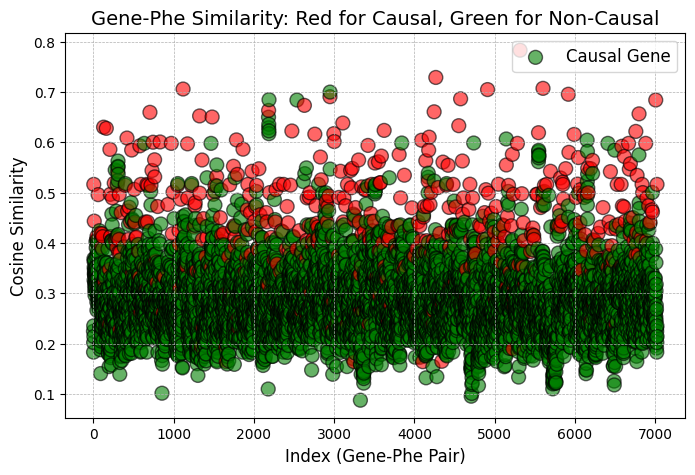

In [213]:
import numpy as np
import matplotlib.pyplot as plt

similarities = exploded_df['cosine_similarity'].tolist()
casual_gene_labels = abc['Casual_Gene'].tolist()

similarity_array = np.array(similarities)

colors = np.where(np.array(casual_gene_labels) == 1, 'red', 'green')

plt.figure(figsize=(8, 5))

plt.scatter(np.arange(len(similarity_array)), similarity_array, c=colors, s=100, alpha=0.6, edgecolor='black')

plt.title('Gene-Phe Similarity: Red for Causal, Green for Non-Causal', fontsize=14)
plt.xlabel('Index (Gene-Phe Pair)', fontsize=12)
plt.ylabel('Cosine Similarity', fontsize=12)

plt.legend(['Causal Gene', 'Non-Causal Gene'], loc='upper right', fontsize=12)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()


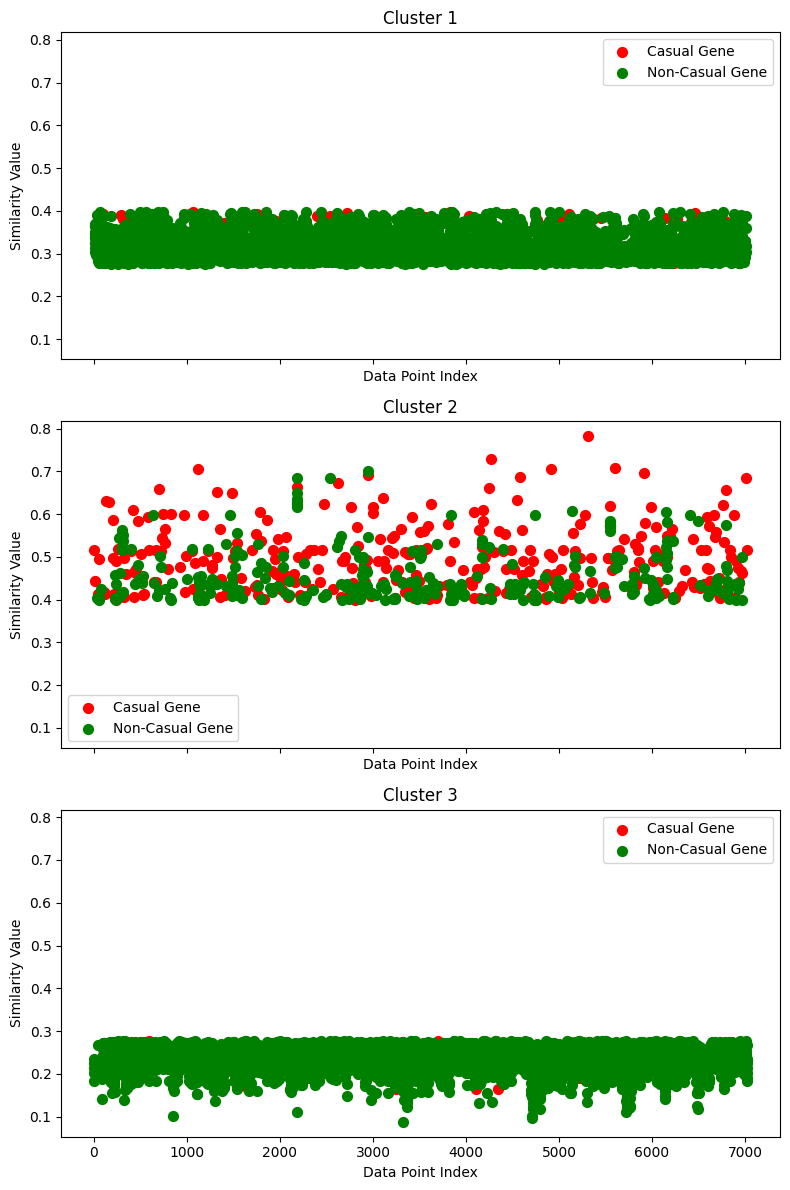

In [214]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

similarity_array = np.array(similarities).reshape(-1, 1)

casual_gene_indices = np.where(exploded_df['Casual_Gene'] == 1)[0]
non_casual_gene_indices = np.where(exploded_df['Casual_Gene'] == 0)[0]
k = 3

kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(similarity_array)

fig, axs = plt.subplots(k, 1, figsize=(8, 12), sharex=True, sharey=True)


for i in range(k):
    cluster_indices = np.where(cluster_labels == i)[0]

    cluster_casual_indices = np.intersect1d(casual_gene_indices, cluster_indices)
    cluster_non_casual_indices = np.intersect1d(non_casual_gene_indices, cluster_indices)

    axs[i].scatter(cluster_casual_indices, similarity_array[cluster_casual_indices],
                   c='red', label='Casual Gene', s=50)

    axs[i].scatter(cluster_non_casual_indices, similarity_array[cluster_non_casual_indices],
                   c='green', label='Non-Casual Gene', s=50)

    axs[i].set_title(f'Cluster {i + 1}')
    axs[i].set_xlabel('Data Point Index')
    axs[i].set_ylabel('Similarity Value')
    axs[i].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


***USING*** ***PCA***

In [215]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from ast import literal_eval

In [216]:
abc = exploded_df.copy()

In [217]:
abc

,row_number,description,symbol_gene_string,gene,Casual_Gene,embedding,Phenotype_embedding,cosine_similarity
0,684,Type 2 diabetes (type II diabetes mellitus),AARD,ENSG00000164756,0,"[-0.0029708947986364365, 0.015198853798210621,...","[-0.008776935748755932, 0.0038059279322624207,...",0.224772
1,684,Type 2 diabetes (type II diabetes mellitus),EIF3H,ENSG00000164756,0,"[-0.02514079213142395, 0.015469358302652836, 0...","[-0.008776935748755932, 0.0038059279322624207,...",0.183171
2,684,Type 2 diabetes (type II diabetes mellitus),MED30,ENSG00000164756,0,"[0.03018919937312603, 0.011147184297442436, -0...","[-0.008776935748755932, 0.0038059279322624207,...",0.202206
3,684,Type 2 diabetes (type II diabetes mellitus),RAD21,ENSG00000164756,0,"[-0.006057532504200935, -0.015056256204843521,...","[-0.008776935748755932, 0.0038059279322624207,...",0.235484
4,684,Type 2 diabetes (type II diabetes mellitus),SLC30A8,ENSG00000164756,1,"[-0.005164204631000757, 0.02107117511332035, -...","[-0.008776935748755932, 0.0038059279322624207,...",0.516301
...,...,...,...,...,...,...,...,...
7342,670,Type 2 diabetes (type II diabetes mellitus),EIF3H,ENSG00000164756,0,"[-0.02514079213142395, 0.015469358302652836, 0...","[-0.008776935748755932, 0.0038059279322624207,...",0.183171
7343,670,Type 2 diabetes (type II diabetes mellitus),MED30,ENSG00000164756,0,"[0.03018919937312603, 0.011147184297442436, -0...","[-0.008776935748755932, 0.0038059279322624207,...",0.202206
7344,670,Type 2 diabetes (type II diabetes mellitus),RAD21,ENSG00000164756,0,"[-0.006057532504200935, -0.015056256204843521,...","[-0.008776935748755932, 0.0038059279322624207,...",0.235484
7345,670,Type 2 diabetes (type II diabetes mellitus),SLC30A8,ENSG00000164756,1,"[-0.005164204631000757, 0.02107117511332035, -...","[-0.008776935748755932, 0.0038059279322624207,...",0.516301


In [218]:
abc['embedding'] = abc['embedding'].apply(lambda x: np.array(ast.literal_eval(x)) if isinstance(x, str) else np.array(x))

In [219]:
abc['Phenotype_embedding'] = abc['Phenotype_embedding'].apply(lambda x: np.array(ast.literal_eval(x)) if isinstance(x, str) else np.array(x))

In [220]:
embeddings = np.array(abc['embedding'].tolist())
Pheno_embeddings = np.array(abc['Phenotype_embedding'].tolist())

In [221]:
embeddings

array([[-2.97089480e-03,  1.51988538e-02, -1.11387959e-02, ...,
        -4.21463774e-05, -1.56602245e-02, -6.03076816e-03],
       [-2.51407921e-02,  1.54693583e-02,  5.01921459e-04, ...,
         5.16878907e-03,  2.05888040e-02, -6.51958212e-03],
       [ 3.01891994e-02,  1.11471843e-02, -1.07537545e-02, ...,
         1.16652008e-02, -1.10225985e-02, -3.59660643e-03],
       ...,
       [-6.05753250e-03, -1.50562562e-02, -1.17779840e-02, ...,
         1.32915415e-02,  6.97293668e-04,  8.59885383e-03],
       [-5.16420463e-03,  2.10711751e-02, -1.02918493e-02, ...,
         1.67204458e-02, -1.68179423e-02,  1.02674747e-02],
       [-2.86364020e-03,  1.17076561e-03, -6.69827592e-03, ...,
        -2.71003199e-04, -3.63526313e-04,  1.54881703e-03]])

In [222]:
Pheno_embeddings

array([[-0.00877694,  0.00380593, -0.00576266, ...,  0.01610798,
        -0.02153307,  0.0005732 ],
       [-0.00877694,  0.00380593, -0.00576266, ...,  0.01610798,
        -0.02153307,  0.0005732 ],
       [-0.00877694,  0.00380593, -0.00576266, ...,  0.01610798,
        -0.02153307,  0.0005732 ],
       ...,
       [-0.00877694,  0.00380593, -0.00576266, ...,  0.01610798,
        -0.02153307,  0.0005732 ],
       [-0.00877694,  0.00380593, -0.00576266, ...,  0.01610798,
        -0.02153307,  0.0005732 ],
       [-0.00877694,  0.00380593, -0.00576266, ...,  0.01610798,
        -0.02153307,  0.0005732 ]])

In [223]:
casual_gene_labels = abc['Casual_Gene'].tolist()

In [224]:
cos_simi = (abc['cosine_similarity']).tolist

In [225]:
combined_embeddings = np.concatenate([embeddings, Pheno_embeddings], axis=0)

In [226]:
from sklearn.decomposition import PCA

In [227]:
pca = PCA(n_components=2)
pca_embeddings = pca.fit_transform(combined_embeddings)

In [228]:
pca_gene_embeddings = pca_embeddings[:len(embeddings)]
pca_phenotype_embeddings = pca_embeddings[len(embeddings):]

In [229]:
pca_gene_embeddings

array([[0.24296534, 0.02544643],
       [0.3120809 , 0.08514361],
       [0.30755717, 0.07032484],
       ...,
       [0.29112024, 0.09099057],
       [0.00253322, 0.29523147],
       [0.33999294, 0.10762158]])

In [230]:
pca_phenotype_embeddings

array([[-0.66555818,  0.32258554],
       [-0.66555818,  0.32258554],
       [-0.66555818,  0.32258554],
       ...,
       [-0.66555818,  0.32258554],
       [-0.66555818,  0.32258554],
       [-0.66555818,  0.32258554]])

In [231]:
print(pca_gene_embeddings.shape)
print(pca_phenotype_embeddings.shape)
print(len(casual_gene_labels))

(7026, 2)
(7026, 2)
7026


In [232]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [234]:
similarities = (abc.cosine_similarity).tolist()

In [235]:
similarity_matrix = np.array(similarities)

In [236]:
similarity_results = []

for i in range(len(pca_gene_embeddings)):
    gene_embedding = pca_gene_embeddings[i].reshape(1, -1)
    phenotype_embedding = pca_phenotype_embeddings[i].reshape(1, -1)

    similarity = cosine_similarity(gene_embedding, phenotype_embedding)[0][0]
    similarity_results.append({
        "similarity": similarity,
        "causal_gene": abc['Casual_Gene'].iloc[i]
    })

similarity_df = pd.DataFrame(similarity_results)

print(similarity_df.head())


   similarity  causal_gene
0   -0.849546            0
1   -0.753344            0
2   -0.780012            0
3   -0.728783            0
4    0.428417            1


In [237]:
similarity_df[similarity_df["causal_gene"] == 1]['similarity'].mean()

-0.3773022779999714

In [239]:
similarity_df[similarity_df["causal_gene"] == 0]['similarity'].mean()

-0.6741717807929086

In [240]:
pca_simi = (similarity_df.similarity).tolist()

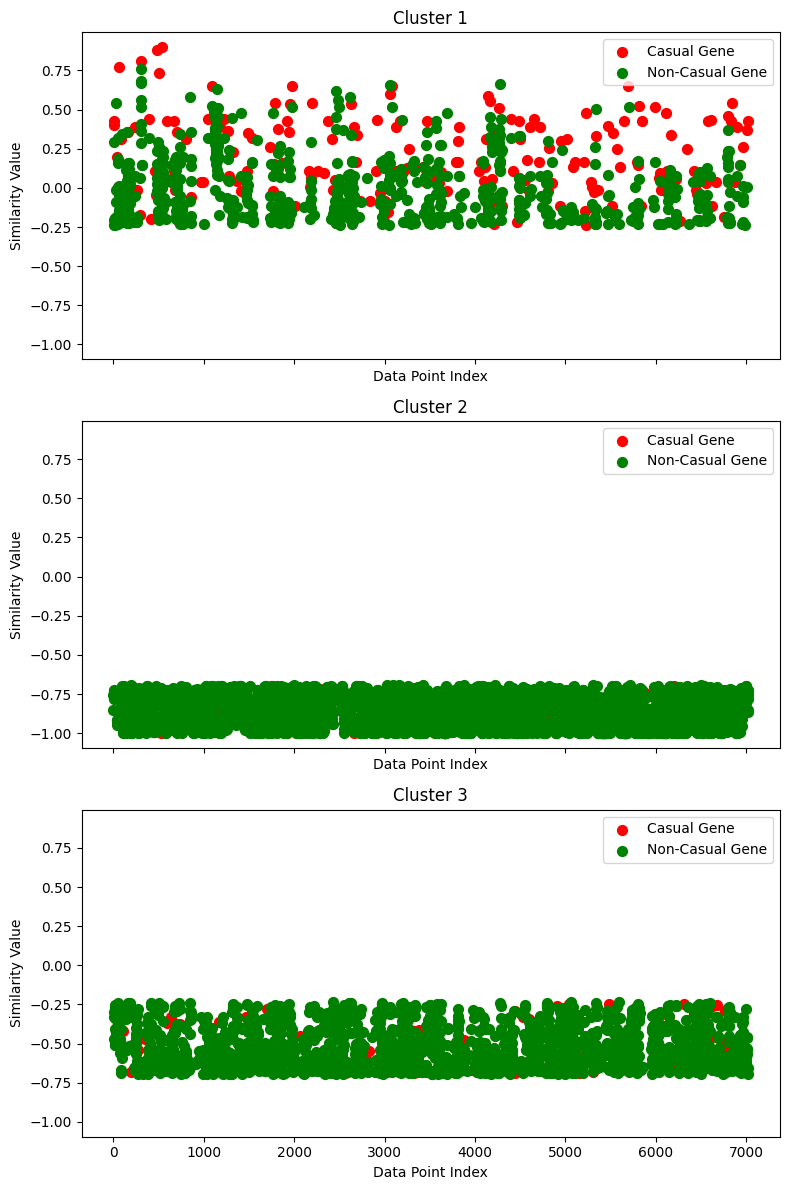

In [241]:
similarity_array = np.array(pca_simi).reshape(-1, 1)

casual_gene_indices = np.where(exploded_df['Casual_Gene'] == 1)[0]
non_casual_gene_indices = np.where(exploded_df['Casual_Gene'] == 0)[0]
k = 3

kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(similarity_array)

fig, axs = plt.subplots(k, 1, figsize=(8, 12), sharex=True, sharey=True)


for i in range(k):
    cluster_indices = np.where(cluster_labels == i)[0]

    cluster_casual_indices = np.intersect1d(casual_gene_indices, cluster_indices)
    cluster_non_casual_indices = np.intersect1d(non_casual_gene_indices, cluster_indices)

    axs[i].scatter(cluster_casual_indices, similarity_array[cluster_casual_indices],
                   c='red', label='Casual Gene', s=50)

    axs[i].scatter(cluster_non_casual_indices, similarity_array[cluster_non_casual_indices],
                   c='green', label='Non-Casual Gene', s=50)

    axs[i].set_title(f'Cluster {i + 1}')
    axs[i].set_xlabel('Data Point Index')
    axs[i].set_ylabel('Similarity Value')
    axs[i].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


T-Test (Statistical Analysis)

In [242]:
from scipy.stats import ttest_ind

causal_similarities = similarity_df[similarity_df['causal_gene'] == 1]['similarity']
non_causal_similarities = similarity_df[similarity_df['causal_gene'] == 0]['similarity']

t_stat, p_value = ttest_ind(causal_similarities, non_causal_similarities)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4e}")

if p_value < 0.05:
    print("The difference in cosine similarities between causal and non-causal genes is statistically significant.")
else:
    print("There is no statistically significant difference in cosine similarities between causal and non-causal genes.")


T-statistic: 18.8847
P-value: 1.2471e-77
The difference in cosine similarities between causal and non-causal genes is statistically significant.


**2D Visual for** **Embeddinsg**

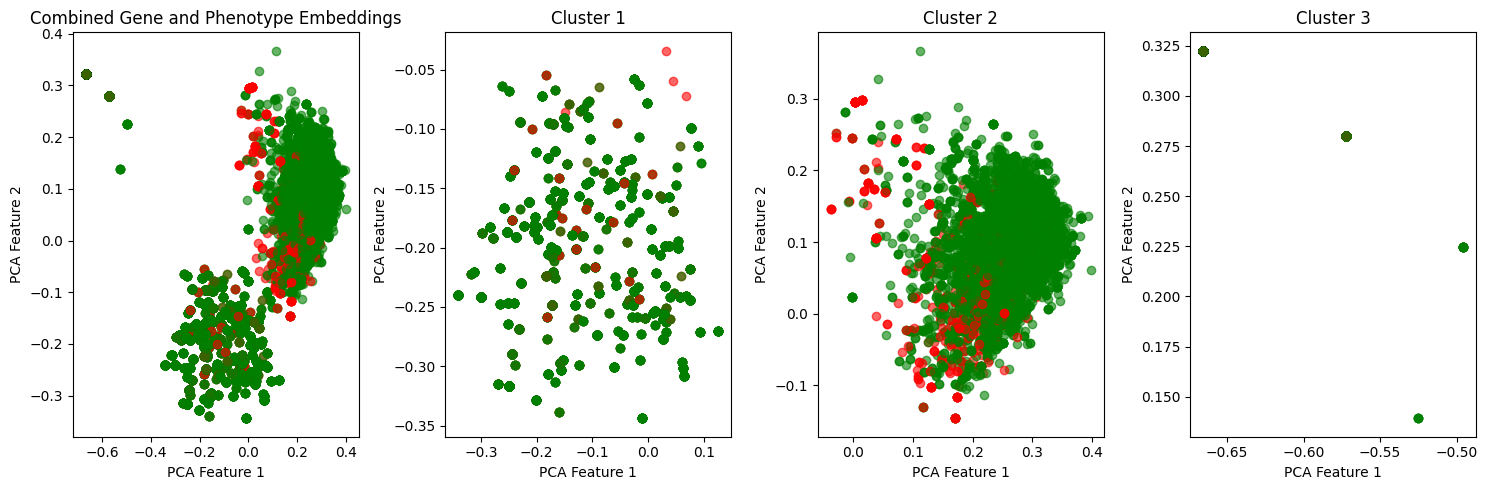

In [233]:
combined_embeddings = np.concatenate([pca_phenotype_embeddings, pca_gene_embeddings], axis=0)
combined_labels = np.concatenate([casual_gene_labels, casual_gene_labels], axis=0)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(combined_embeddings)

plt.figure(figsize=(15, 5))

plt.subplot(141)
for i in range(len(combined_labels)):
    color = 'red' if combined_labels[i] == 1 else 'green'
    plt.scatter(combined_embeddings[i, 0], combined_embeddings[i, 1], color=color, alpha=0.6)
plt.title("Combined Gene and Phenotype Embeddings")
plt.xlabel("PCA Feature 1")
plt.ylabel("PCA Feature 2")

for cluster_num in range(3):
    plt.subplot(1, 4, cluster_num + 2)
    for i in range(len(clusters)):
        if clusters[i] == cluster_num:
            color = 'red' if combined_labels[i] == 1 else 'green'
            plt.scatter(combined_embeddings[i, 0], combined_embeddings[i, 1], color=color, alpha=0.6)
    plt.title(f"Cluster {cluster_num + 1}")
    plt.xlabel("PCA Feature 1")
    plt.ylabel("PCA Feature 2")

plt.tight_layout()
plt.show()